Importing differential TX data for identifying differently expressed alleles

In [74]:
import pandas as pd
import numpy as np

as_test = pd.read_pickle("data/SS3_c57_UMIs_concat_vs_SS3_cast_UMIs_concat_TEST.pkl")
as_test = as_test.dropna()
as_test.head()

,0,1,2,3,4
0610007P14Rik,"[1.1173254981562086, 7.647917691822296, 18.568...","[1.0881543567246692, 5.182682836792884, 12.438...",0.909252,0.954243,0610007P14Rik
0610009B22Rik,"[1.1670171103343407, 11.78732708906382, 43.102...","[0.9168543360553596, 2.8861629478375206, 15.68...",0.215580,0.169670,0610009B22Rik
0610009O20Rik,"[0.29388391257993357, 1.105312640766959, 2.238...","[0.4329411244360464, 10.090309987467426, 11.54...",0.426255,0.300822,0610009O20Rik
0610010F05Rik,"[0.6222916672997535, 335.7738846409449, 360.11...","[0.40747384269585574, 162.98845781409838, 243....",0.227532,0.389678,0610010F05Rik
0610012G03Rik,"[0.07111963761358953, 0.43058695104757994, 21....","[0.17987076536784363, 0.3460432821317886, 22.7...",0.096802,0.427180,0610012G03Rik


Removing significant rows for either size or frequency.

In [75]:
sig_as = as_test.loc[(as_test[2] < 0.05) | (as_test[3] < 0.05)]
non_sig_as = as_test.loc[(as_test[2] >= 0.05) | (as_test[3] >= 0.05)]
non_sig_as_ids = np.array(as_test[4])
non_sig_as_ids.tofile("data/non_sig_as_ids.txt", sep="\n")

Now to add ensembl annotations. ID file was uploaded to MGI @ https://www.informatics.jax.org/batch. Remove non-mitotic chromosomes and random contigs.

In [76]:
ens_non_sig_ids = pd.read_csv("data/MGIBatchReport_20231207_141900.txt", sep="\t")

ens_non_sig_ids = ens_non_sig_ids.iloc[[i for i in range(len(ens_non_sig_ids["Chr"])) if ens_non_sig_ids["Chr"][i] not in ["X","Y","UN"]]].dropna()
ens_non_sig_ids

,Input,Input Type,MGI Gene/Marker ID,Chr,Strand,Start,End,Ensembl ID
0,0610007P14Rik,old symbol,MGI:1915571,12,-,85862222.0,85871324.0,ENSMUSG00000021252
1,0610009B22Rik,old symbol,MGI:1913300,11,-,51576213.0,51579701.0,ENSMUSG00000007777
2,0610009O20Rik,old symbol,MGI:1914089,18,+,38383302.0,38395682.0,ENSMUSG00000024442
3,0610010F05Rik,old symbol,MGI:1918925,11,-,23514961.0,23583639.0,ENSMUSG00000042208
4,0610012G03Rik,old symbol,MGI:1913301,16,-,31765868.0,31767312.0,ENSMUSG00000107002
...,...,...,...,...,...,...,...,...
6583,Zwint,current symbol,MGI:1289227,10,+,72490678.0,72510796.0,ENSMUSG00000019923
6584,Zxdc,current symbol,MGI:1933108,6,+,90346474.0,90380472.0,ENSMUSG00000034430
6585,Zyg11b,current symbol,MGI:2685277,4,-,108086921.0,108158293.0,ENSMUSG00000034636
6586,Zyx,current symbol,MGI:103072,6,+,42326564.0,42337147.0,ENSMUSG00000029860


Getting allele specific UMI counts

In [77]:
c57_ex = pd.read_csv("data/merged.fixed.BL6_fractional_UMIs.csv")
cast_ex = pd.read_csv("data/merged.fixed.CAST_fractional_UMIs.csv")
c57_ex.rename(columns={"Unnamed: 0": "ID"}, inplace=True)
cast_ex.rename(columns={"Unnamed: 0": "ID"}, inplace=True)
c57_ex

,ID,AACGCTACCACCAT,AACGCTACCGTTAC,AACGCTAGAAGGCT,AACGCTATTGCTCC,AACGCTCAACGGTC,AACGCTCAGTGGAG,AACGCTCCGCACCT,AACGCTCGAACCAC,AACGCTCGTTCAAC,...,TGAGGTGAGGAGGT,TGAGGTGATTGCGC,TGAGGTGCAAGGTT,TGAGGTGCGAGGAT,TGAGGTGGCGATAT,TGAGGTGGTAGCAC,TGAGGTGTACATAC,TGAGGTGTAGATGG,TGAGGTTATCCATA,TGAGGTTTGCTCGT
0,ENSMUSG00000000001,16.0,18.0,11.0,18.0,16.0,8.0,7.0,2.0,1.0,...,7.0,13.0,11.0,11.0,9.0,11.0,1.0,11.0,5.0,7.0
1,ENSMUSG00000000028,0.0,4.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,...,NaN,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0
2,ENSMUSG00000000037,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,1.0,1.0,2.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0
3,ENSMUSG00000000049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,ENSMUSG00000000056,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,...,0.0,2.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20299,ENSMUSG00000104509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20300,ENSMUSG00000104512,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20301,ENSMUSG00000104514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20302,ENSMUSG00000104515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Filtering rows that are non-allele specific

In [78]:
#c57_ex.loc[c57_ex["ID"] == ens_non_sig_ids["Ensembl ID"]]
#ens_non_sig_ids["Ensembl ID"]
c57_ex_filtered = c57_ex.iloc[[i for i in range(len(c57_ex["ID"])) if c57_ex["ID"][i] in list(ens_non_sig_ids["Ensembl ID"])]].set_index("ID")
cast_ex_filtered = cast_ex.iloc[[i for i in range(len(cast_ex["ID"])) if cast_ex["ID"][i] in list(ens_non_sig_ids["Ensembl ID"])]].set_index("ID")
c57_ex_filtered

,AACGCTACCACCAT,AACGCTACCGTTAC,AACGCTAGAAGGCT,AACGCTATTGCTCC,AACGCTCAACGGTC,AACGCTCAGTGGAG,AACGCTCCGCACCT,AACGCTCGAACCAC,AACGCTCGTTCAAC,AACGCTCTTCTCCT,...,TGAGGTGAGGAGGT,TGAGGTGATTGCGC,TGAGGTGCAAGGTT,TGAGGTGCGAGGAT,TGAGGTGGCGATAT,TGAGGTGGTAGCAC,TGAGGTGTACATAC,TGAGGTGTAGATGG,TGAGGTTATCCATA,TGAGGTTTGCTCGT
ID,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000000001,16.0,18.0,11.0,18.0,16.0,8.0,7.0,2.0,1.0,9.0,...,7.0,13.0,11.0,11.0,9.0,11.0,1.0,11.0,5.0,7.0
ENSMUSG00000000028,0.0,4.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0
ENSMUSG00000000058,2.0,2.0,3.0,0.0,2.0,1.0,7.0,0.0,0.0,0.0,...,0.0,0.0,2.0,3.0,0.0,3.0,0.0,1.0,1.0,8.0
ENSMUSG00000000078,NaN,10.0,8.0,0.0,13.0,3.0,NaN,2.0,0.0,0.0,...,0.0,11.0,41.0,11.0,12.0,8.0,0.0,30.0,10.0,23.0
ENSMUSG00000000088,3.0,3.0,4.0,7.0,4.0,3.0,4.0,2.0,0.0,2.0,...,11.0,7.0,7.0,5.0,4.0,5.0,3.0,7.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000100937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSMUSG00000101609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSMUSG00000101892,2.0,9.0,7.0,6.0,6.0,2.0,1.0,0.0,5.0,1.0,...,6.0,3.0,15.0,2.0,2.0,5.0,4.0,6.0,7.0,2.0


In [79]:
#removing cells if NAs make a quarter of the data
for col in c57_ex_filtered.columns:
    if len(c57_ex_filtered[col][c57_ex_filtered[col].isna()]) >= len(c57_ex_filtered[col]) / 4:
        c57_ex_filtered.drop(col, axis=1, inplace=True)
        print("removing: " + col)

for col in cast_ex_filtered.columns:
    if len(cast_ex_filtered[col][cast_ex_filtered[col].isna()]) >= len(cast_ex_filtered[col]) / 4:
        cast_ex_filtered.drop(col, axis=1, inplace=True)
        print("removing: " + col)
#
# #removing genes
#
for i in c57_ex_filtered.index:
    if len(c57_ex_filtered.loc[i, :][c57_ex_filtered.loc[i, :].isna()]) >= len(c57_ex_filtered.loc[i, :]) / 2:
        c57_ex_filtered.drop(index=i, inplace=True)
        print("removing: " + i)
#
for i in cast_ex_filtered.index:
    if len(cast_ex_filtered.loc[i, :][cast_ex_filtered.loc[i, :].isna()]) >= len(cast_ex_filtered.loc[i, :]) / 2:
        cast_ex_filtered.drop(index=i, inplace=True)
        print("removing: " + i)

removing: ENSMUSG00000001383
removing: ENSMUSG00000001542
removing: ENSMUSG00000004798
removing: ENSMUSG00000004895
removing: ENSMUSG00000005698
removing: ENSMUSG00000005892
removing: ENSMUSG00000009013
removing: ENSMUSG00000013822
removing: ENSMUSG00000014294
removing: ENSMUSG00000014592
removing: ENSMUSG00000015053
removing: ENSMUSG00000015943
removing: ENSMUSG00000018379
removing: ENSMUSG00000020114
removing: ENSMUSG00000020189
removing: ENSMUSG00000020585
removing: ENSMUSG00000020594
removing: ENSMUSG00000020694
removing: ENSMUSG00000020863
removing: ENSMUSG00000021051
removing: ENSMUSG00000021054
removing: ENSMUSG00000021116
removing: ENSMUSG00000021143
removing: ENSMUSG00000021144
removing: ENSMUSG00000021385
removing: ENSMUSG00000021400
removing: ENSMUSG00000021552
removing: ENSMUSG00000021559
removing: ENSMUSG00000021876
removing: ENSMUSG00000022325
removing: ENSMUSG00000022378
removing: ENSMUSG00000022387
removing: ENSMUSG00000022426
removing: ENSMUSG00000022663
removing: ENSM

In [80]:
def remove_low(row):
    return np.nanmean(row) > 1

c57_ex_filtered = c57_ex_filtered.loc[c57_ex_filtered.apply(remove_low, axis=1)]
cast_ex_filtered = cast_ex_filtered.loc[cast_ex_filtered.apply(remove_low, axis=1)]

#Removing non-consistent annotation among alleles
cast_counts =cast_ex_filtered.loc[[index for index in c57_ex_filtered.index.values if index in cast_ex_filtered.index.values],:]
c57_counts = c57_ex_filtered.loc[[index for index in cast_ex_filtered.index.values if index in c57_ex_filtered.index.values],:]
#sanity check
all(cast_counts.index.values == c57_counts.index.values)




True

Making Cell indexes consistent

In [81]:
cast_counts = cast_counts[[index for index in list(c57_counts.columns) if index in list(cast_counts.columns)]]
c57_counts = c57_counts[[index for index in list(cast_counts.columns) if index in list(c57_counts.columns)]]
list(cast_counts.columns) == list(c57_counts.columns)

True

Imputing missing values

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import miceforest as mf
import random
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
from sklearn.impute import KNNImputer

#impute_dict = {}
#regressor = KNNImputer(n_neighbors=25)

#impute_dict["c57"] = pd.DataFrame(np.round(regressor.fit_transform(c57_counts)),
#                           columns=list(c57_counts.columns),
#                           index=list(c57_counts.index))
#impute_dict["cast"] = pd.DataFrame(np.round(regressor.fit_transform(cast_counts)),
#                                  columns=list(cast_counts.columns),
#                                  index=list(cast_counts.index))


# kernel = mf.ImputationKernel(
#     data=c57_counts,
#     save_all_iterations=True,
#     random_state=1343
# )
#
# imputer = MissForest(max_iter = 3, max_depth = 50, n_jobs = 8, verbose=1)
# c57_imputed = imputer.fit_transform(c57_counts)
# c57_imputed = pd.DataFrame(c57_imputed, columns = c57_counts.columns, index = c57_counts.index).round(1)
#
# cast_imputed = imputer.fit_transform(cast_counts)
# cast_imputed = pd.DataFrame(cast_imputed, columns = cast_counts.columns, index = cast_counts.index).round(1)




In [83]:
#saving data
#import pickle
#imputed_as_counts = open("mf_imputed_as_counts.pkl", "wb")
#pickle.dump(impute_dict, imputed_as_counts)
#imputed_as_counts.close()

In [84]:
#loading in imputed data
import pickle
file = open("data/mf_imputed_as_counts.pkl", 'rb')
impute_dict = pickle.load(file)
file.close()


/home/ben/.virtualenvs/tx_noise/lib/python3.8/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Axes: xlabel='Library size', ylabel='Number of cells'>

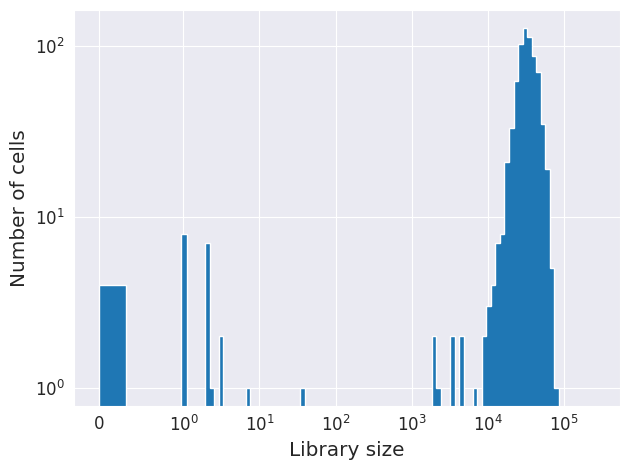

In [85]:
import scprep
scprep.plot.plot_library_size(impute_dict["c57"].transpose())

In [86]:
for allele in impute_dict.keys():
    impute_dict[allele] = scprep.filter.filter_library_size(impute_dict[allele].transpose(), cutoff=9000, keep_cells="above").transpose()


correcting for cell index consistency

In [87]:
impute_dict["cast"] = impute_dict["cast"][[index for index in list(impute_dict["c57"].columns) if index in list(impute_dict["cast"].columns)]]

impute_dict["c57"] = impute_dict["c57"][[index for index in list(impute_dict["cast"].columns) if index in list(impute_dict["c57"].columns)]]


#sanity check
list(impute_dict["c57"].columns) == list(impute_dict["cast"].columns)

True

library size normalization

In [88]:
ln_impute_dict = {}
for allele in impute_dict.keys():
    ln_impute_dict[allele] = scprep.normalize.library_size_normalize(impute_dict[allele].transpose(), rescale="mean").transpose()
ln_impute_dict["cast"]

,AACGCTACCACCAT,AACGCTACCGTTAC,AACGCTAGAAGGCT,AACGCTATTGCTCC,AACGCTCAACGGTC,AACGCTCAGTGGAG,AACGCTCCGCACCT,AACGCTCGAACCAC,AACGCTCTTCTCCT,AACGCTGCGTCACC,...,TGAGGTGAGGAGGT,TGAGGTGATTGCGC,TGAGGTGCAAGGTT,TGAGGTGCGAGGAT,TGAGGTGGCGATAT,TGAGGTGGTAGCAC,TGAGGTGTACATAC,TGAGGTGTAGATGG,TGAGGTTATCCATA,TGAGGTTTGCTCGT
ID,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000000001,7.284268,9.005434,11.222721,9.071546,14.239364,5.403355,14.022479,6.804896,17.340946,7.339427,...,13.028838,16.022906,8.622565,15.744536,10.777779,19.331337,5.147570,16.274415,8.584627,8.849801
ENSMUSG00000000028,0.000000,0.000000,0.187045,2.556527,0.000000,0.000000,0.584270,0.000000,0.000000,2.495405,...,0.000000,0.000000,4.311283,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.474967
ENSMUSG00000000058,2.081220,0.000000,1.870453,0.000000,0.000000,1.080671,2.337080,0.000000,0.000000,1.467885,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.841080,0.000000,4.882324,0.000000,2.212450
ENSMUSG00000000078,9.885793,0.000000,0.000000,15.669035,0.000000,9.726040,9.815735,10.207345,15.606851,14.678855,...,0.000000,0.000000,22.274960,11.450572,16.166668,0.000000,0.000000,0.000000,7.153856,11.062251
ENSMUSG00000000088,3.121829,4.502717,5.611360,1.649372,1.898582,3.242013,3.505620,1.701224,3.468189,0.000000,...,8.143024,5.098197,2.874188,2.862643,2.155556,2.761620,10.295141,3.254883,4.292314,8.112318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000097290,0.000000,0.000000,3.740907,0.000000,4.746455,0.000000,0.000000,6.804896,0.000000,4.403656,...,0.000000,2.184942,2.155641,0.000000,1.077778,1.841080,0.000000,2.441162,2.861542,2.949934
ENSMUSG00000097772,0.000000,0.000000,3.740907,3.298744,2.847873,0.000000,5.842700,0.000000,0.000000,0.000000,...,0.000000,0.728314,0.000000,1.431321,7.544445,0.000000,7.721356,1.627441,2.861542,0.000000
ENSMUSG00000098234,2.081220,6.003623,0.000000,0.824686,0.000000,1.080671,2.337080,0.000000,1.734095,0.000000,...,0.000000,0.728314,1.437094,0.000000,4.311111,1.841080,2.573785,0.813721,2.861542,0.737483


In [89]:
#performing my own library size norm that handles Nas

#remove low lib size
cast_counts = cast_counts.loc[:,cast_counts.sum(axis=0) >= 100]
c57_counts = c57_counts.loc[:,c57_counts.sum(axis=0) >= 100]
#
#cast_counts = cast_counts.div(cast_counts.sum(axis=0)) * 10000
#c57_counts = c57_counts.div(c57_counts.sum(axis=0)) * 10000


#cast_counts

In [90]:
counts_l = scprep.utils.check_consistent_columns([cast_counts,c57_counts])

In [91]:
non_impute_no_ln = {"c57":counts_l[1], "cast":counts_l[0]}
non_impute_no_ln["cast"]

,AACGCTACCACCAT,AACGCTACCGTTAC,AACGCTAGAAGGCT,AACGCTATTGCTCC,AACGCTCAACGGTC,AACGCTCAGTGGAG,AACGCTCCGCACCT,AACGCTCGAACCAC,AACGCTCGTTCAAC,AACGCTCTTCTCCT,...,TGAGGTGAGGAGGT,TGAGGTGATTGCGC,TGAGGTGCAAGGTT,TGAGGTGCGAGGAT,TGAGGTGGCGATAT,TGAGGTGGTAGCAC,TGAGGTGTACATAC,TGAGGTGTAGATGG,TGAGGTTATCCATA,TGAGGTTTGCTCGT
ID,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000000001,7.0,6.0,12.0,11.0,15.0,5.0,12.0,4.0,1.0,10.0,...,8.0,22.0,12.0,11.0,10.0,21.0,2.0,20.0,6.0,12.0
ENSMUSG00000000028,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
ENSMUSG00000000058,2.0,0.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,6.0,0.0,3.0
ENSMUSG00000000078,NaN,0.0,0.0,19.0,0.0,9.0,NaN,6.0,0.0,9.0,...,0.0,0.0,31.0,8.0,15.0,0.0,0.0,0.0,5.0,15.0
ENSMUSG00000000088,3.0,3.0,6.0,2.0,2.0,3.0,3.0,1.0,0.0,2.0,...,5.0,7.0,4.0,2.0,2.0,3.0,4.0,4.0,3.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000097290,0.0,0.0,4.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,...,0.0,3.0,3.0,0.0,1.0,2.0,0.0,3.0,2.0,4.0
ENSMUSG00000097772,0.0,0.0,4.0,4.0,3.0,0.0,5.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,7.0,0.0,3.0,2.0,2.0,0.0
ENSMUSG00000098234,2.0,4.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,...,0.0,1.0,2.0,0.0,4.0,2.0,1.0,1.0,2.0,1.0


Making noise from non-normalized data

In [92]:

def totalNoise(a1, a2):
    #python is strange. *a1 here is all other tuple elements after the first (id).
    (id1, *a1) = a1
    (id2, *a2) = a2
    a1 = np.array(a1)
    a2 = np.array(a2)
    return id1,((np.nanmean((a1 ** 2) + (a2 ** 2))) - (2 * np.nanmean(a1) * np.nanmean(a2))) / (2 * np.nanmean(a1) * np.nanmean(a2))


def intNoise(a1, a2):
    (id1, *a1) = a1
    (id2, *a2) = a2
    a1 = np.array(a1)
    a2 = np.array(a2)
    assert a1.any() and a2.any()
    return id1, (np.nanmean((a1 - a2) ** 2) / ( 2 * np.nanmean(a1) * np.nanmean(a2) ))

def extNoise(a1, a2):
    (id1, *a1) = a1
    (id2, *a2) = a2
    a1 = np.array(a1)
    a2 = np.array(a2)
    return id1, ( np.nanmean(a1 * a2) - (np.nanmean(a1) * np.nanmean(a2)) )/ (np.nanmean(a1) * np.nanmean(a2))

Ntot = np.array([totalNoise(a1,a2) for a1,a2 in zip(c57_counts.itertuples(index=True), cast_counts.itertuples(index=True))], dtype=object)
Ntot_dict = {id: noise for id,noise in Ntot}

Nint = np.array([intNoise(a1,a2) for a1,a2 in zip(c57_counts.itertuples(index=True), cast_counts.itertuples(index=True))], dtype=object)
Nint_dict = {id: noise for id,noise in Nint}

Next = np.array([extNoise(a1,a2) for a1,a2 in zip(c57_counts.itertuples(index=True), cast_counts.itertuples(index=True))], dtype=object)
Next_dict = {id: noise for id,noise in Next}
#len(Ntot)
#len(Nint)
#Ntot_dict

noise_df = pd.DataFrame({"ID":Ntot_dict.keys(), "Ntot":Ntot_dict.values(), "Nint": Nint_dict.values(), "Next":Next_dict.values()})
noise_df.set_index("ID", inplace=True)
noise_df

,Ntot,Nint,Next
ID,,,
ENSMUSG00000000001,0.343163,0.204796,0.138366
ENSMUSG00000000028,5.501222,3.648591,1.852631
ENSMUSG00000000058,2.166279,1.698786,0.467493
ENSMUSG00000000078,0.978513,0.906316,0.072197
ENSMUSG00000000088,0.725305,0.235496,0.489809
...,...,...,...
ENSMUSG00000097290,1.477272,1.445096,0.032176
ENSMUSG00000097772,1.856122,1.478863,0.377259
ENSMUSG00000098234,1.702705,1.571960,0.130745


Calculating noise from library size normalization

In [93]:
def totalNoise(a1, a2):
    #python is strange. *a1 here is all other tuple elements after the first (id).
    (id1, *a1) = a1
    (id2, *a2) = a2
    a1 = np.array(a1)
    a2 = np.array(a2)
    assert id1 == id2
    return id1,((np.nanmean((a1 ** 2) + (a2 ** 2))) - (2 * np.nanmean(a1) * np.nanmean(a2))) / (2 * np.nanmean(a1) * np.nanmean(a2))


def intNoise(a1, a2):
    (id1, *a1) = a1
    (id2, *a2) = a2
    a1 = np.array(a1)
    a2 = np.array(a2)
    assert id1 == id2
   # assert a1.any() and a2.any()
    return id1, (np.nanmean((a1 - a2) ** 2) / ( 2 * np.nanmean(a1) * np.nanmean(a2) ))

def extNoise(a1, a2):
    (id1, *a1) = a1
    (id2, *a2) = a2
    a1 = np.array(a1)
    a2 = np.array(a2)
    assert id1 == id2
    return id1, ( np.nanmean(a1 * a2) - (np.nanmean(a1) * np.nanmean(a2)) )/ (np.nanmean(a1) * np.nanmean(a2))


def makeNoise(counts_dict):
    import pandas as pd
    keys = list(counts_dict.keys())


    Nint = np.array([intNoise(a1,a2) for a1,a2 in zip(counts_dict[keys[0]].itertuples(index=True), counts_dict[keys[1]].itertuples(index=True))], dtype=object)
    Nint_dict = {id: noise for id,noise in Nint}

    Next = np.array([extNoise(a1,a2) for a1,a2 in zip(counts_dict[keys[0]].itertuples(index=True), counts_dict[keys[1]].itertuples(index=True))], dtype=object)
    Next_dict = {id: noise for id,noise in Next}


    Ntot = np.array([totalNoise(a1,a2) for a1,a2 in zip(counts_dict[keys[0]].itertuples(index=True), counts_dict[keys[1]].itertuples(index=True))], dtype=object)
    Ntot_dict = {id: noise for id,noise in Ntot}


    noise_df = pd.DataFrame({"ID":Ntot_dict.keys(), "Ntot":Ntot_dict.values(), "Nint": Nint_dict.values(), "Next":Next_dict.values()})
    noise_df.set_index("ID", inplace=True)

    return noise_df

In [94]:
non_impute_noise = makeNoise(non_impute_no_ln)
non_impute_noise
len(non_impute_noise.loc[non_impute_noise.Next < 0])

1025

In [95]:
ln_noise = makeNoise(ln_impute_dict)
ln_noise

,Ntot,Nint,Next
ID,,,
ENSMUSG00000000001,0.233465,0.211929,0.021537
ENSMUSG00000000028,4.814944,3.589525,1.225419
ENSMUSG00000000058,1.891524,1.591452,0.300072
ENSMUSG00000000078,0.681397,0.774574,-0.093177
ENSMUSG00000000088,0.529788,0.246204,0.283583
...,...,...,...
ENSMUSG00000097290,1.399265,1.436722,-0.037458
ENSMUSG00000097772,1.671890,1.547819,0.124071
ENSMUSG00000098234,1.534081,1.549360,-0.015279


In [96]:
#Checking the number of negative Next values, these are theoretically impossible
len(ln_noise.loc[ln_noise.Next < 0])

1984

/home/ben/.virtualenvs/tx_noise/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


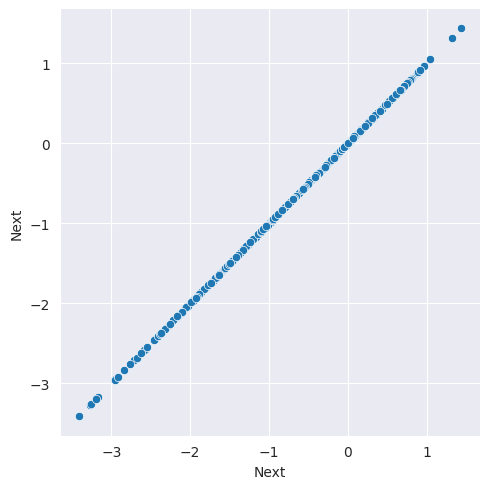

In [97]:
import seaborn as sns
sns.relplot(y=np.log10(noise_df.Next),x=np.log10(non_impute_noise.Next))

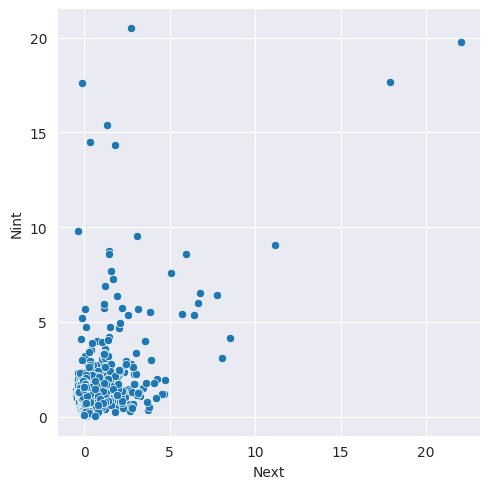

In [98]:
import seaborn as sns
#sns.relplot(y=noise_df.Nint,x=noise_df.Next)
sns.relplot(y=ln_noise.Nint,x=ln_noise.Next)

Loading in kinetics and linkage data

In [99]:
linked_genes = pd.read_csv("data/linked_kinetics.bed", sep="\t")
linked_genes.set_index("gene_id",inplace=True)
linked_genes


,k_on,k_off,k_syn,bf_lower,bf_upper,bs_lower,bs_upper,bf_n,bs_n,HiChIP_Intersect,Symbol,unique_linked_genes,Freq,anchor,bs,string.Freq
gene_id,,,,,,,,,,,,,,,,
ENSMUSG00000000001,4.252039,26.865740,96.092819,2.702795,6.017169,2.210820,7.908801,100,100,chr3:108146159-108146160,Gnai3,Gnai3,5,True,3.576779,5
ENSMUSG00000000028,0.137546,1.025523,16.144363,0.109138,0.212030,9.487846,20.515211,100,100,NaN,NaN,NaN,0,False,15.742559,0
ENSMUSG00000000037,0.078290,0.999971,1.852708,0.034711,0.228232,0.531360,4.224191,100,100,NaN,NaN,NaN,0,False,1.852761,0
ENSMUSG00000000058,0.779049,12.358448,37.516225,0.484199,0.961267,2.394180,6.576081,100,100,NaN,NaN,NaN,0,False,3.035675,0
ENSMUSG00000000078,0.784579,2.727669,56.502058,0.681904,1.103465,12.028828,25.700570,100,100,NaN,NaN,NaN,0,False,20.714410,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000096699,0.055771,0.460551,6.009451,0.029863,0.129351,4.247061,26.079432,100,100,NaN,NaN,NaN,0,False,13.048395,0
ENSMUSG00000097571,0.219019,16.302314,14.232093,0.117263,0.353373,0.479911,1.623884,100,100,NaN,NaN,NaN,0,False,0.873011,0
ENSMUSG00000098466,0.127843,1.424644,1.000000,0.085092,0.548184,0.100207,0.771126,100,100,NaN,NaN,NaN,0,False,0.701930,0


In [100]:
linked_genes_noise = linked_genes.join(noise_df, how="inner")
linked_genes_noise_non_impute = linked_genes.join(non_impute_noise, how="inner")
ln_linked_genes_noise = linked_genes.join(ln_noise, how="inner")
linked_genes_noise_non_impute

,k_on,k_off,k_syn,bf_lower,bf_upper,bs_lower,bs_upper,bf_n,bs_n,HiChIP_Intersect,Symbol,unique_linked_genes,Freq,anchor,bs,string.Freq,Ntot,Nint,Next
ENSMUSG00000000001,4.252039,26.865740,96.092819,2.702795,6.017169,2.210820,7.908801,100,100,chr3:108146159-108146160,Gnai3,Gnai3,5,True,3.576779,5,0.343163,0.204796,0.138366
ENSMUSG00000000028,0.137546,1.025523,16.144363,0.109138,0.212030,9.487846,20.515211,100,100,NaN,NaN,NaN,0,False,15.742559,0,5.501222,3.648591,1.852631
ENSMUSG00000000058,0.779049,12.358448,37.516225,0.484199,0.961267,2.394180,6.576081,100,100,NaN,NaN,NaN,0,False,3.035675,0,2.166279,1.698786,0.467493
ENSMUSG00000000078,0.784579,2.727669,56.502058,0.681904,1.103465,12.028828,25.700570,100,100,NaN,NaN,NaN,0,False,20.714410,0,0.978513,0.906316,0.072197
ENSMUSG00000000088,3.452998,506.084127,1644.498378,3.098385,5.809828,1.812725,3.698460,100,100,NaN,NaN,NaN,0,False,3.249457,0,0.725305,0.235496,0.489809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000097290,0.696919,1.500963,7.284798,0.488259,1.043772,2.463425,8.270527,100,100,NaN,NaN,NaN,0,False,4.853414,0,1.477272,1.445096,0.032176
ENSMUSG00000097772,0.815998,65.563071,152.575827,0.534629,0.952615,1.942072,4.683730,100,100,NaN,NaN,NaN,0,False,2.327161,0,1.856122,1.478863,0.377259
ENSMUSG00000098234,3.062101,7.886858,44.810994,2.399691,5.062430,2.470521,8.788027,100,100,NaN,NaN,NaN,0,False,5.681729,0,1.702705,1.571960,0.130745
ENSMUSG00000098332,1.804533,4.138814,11.630906,1.162881,3.036864,1.211191,5.736895,100,100,NaN,NaN,NaN,0,False,2.810203,0,0.849777,0.650848,0.198930


In [101]:
len(linked_genes_noise_non_impute.loc[linked_genes_noise_non_impute.Next < 0])

951

In [102]:
linked_genes_noise.to_csv("data/linked_kinetics_noise.bed", sep="\t")
#ln_linked_genes_noise.to_csv("ln_linked_kinetics_noise.bed", sep="\t")
linked_genes_noise_non_impute.to_csv("data/ln_nas_linked_kinetics_noise.bed", sep="\t")
#c57_ex_filtered.to_csv("c57_filtered_ex.txt", sep="\t")
#cast_ex_filtered.to_csv("cast_filtered_ex.txt", sep="\t")
